In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import numpy as np
import pandas as pd 
from BHDVCS_torch import TBHDVCS

import BHDVCS_fit as dvcsfit

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import chisquare

tb = TBHDVCS()

f = tb.TotalUUXS_curve_fit3

loss_func = tb.loss_function

In [2]:
dats = pd.read_csv('dvcs_psuedo.csv')

n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
ydat = np.array(dats['F'])
errF = np.array(dats['errF']) 
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])  
ReH_target = np.array(dats['ReH']) 
ReE_target = np.array(dats['ReE']) 
ReHT_target = np.array(dats['ReHtilde'])
err_H = []
err_E = []
err_HT = []

EPOCH = 2500

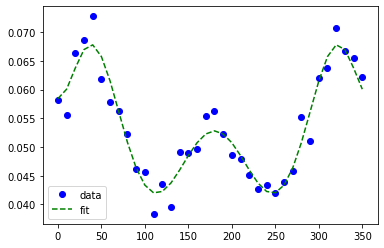

Chi-Squared Value for this fit: 4.313e-03
Chi-Squared Value for expected fit: 4.397e-03
MSE Loss Value for this fit: 9.212e-01
Average Error for set #0 using ANN = 6.29%
Average Error for set #0 using scipy = 8.25%


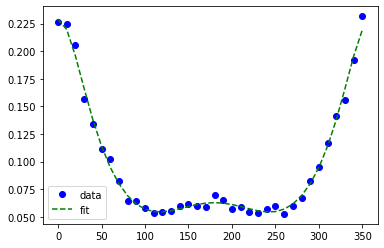

Chi-Squared Value for this fit: 6.937e-03
Chi-Squared Value for expected fit: 7.247e-03
MSE Loss Value for this fit: 8.750e-01
Average Error for set #1 using ANN = 7.77%
Average Error for set #1 using scipy = 1.18%


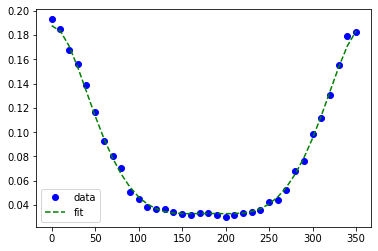

Chi-Squared Value for this fit: 3.180e-03
Chi-Squared Value for expected fit: 2.951e-03
MSE Loss Value for this fit: 5.900e-01
Average Error for set #2 using ANN = 10.65%
Average Error for set #2 using scipy = 12.91%


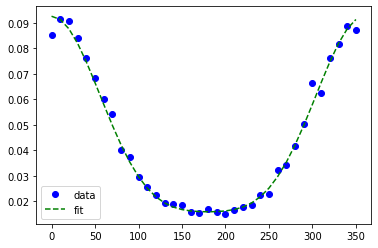

Chi-Squared Value for this fit: 4.053e-03
Chi-Squared Value for expected fit: 4.052e-03
MSE Loss Value for this fit: 1.022e+00
Average Error for set #3 using ANN = 3.64%
Average Error for set #3 using scipy = 9.20%


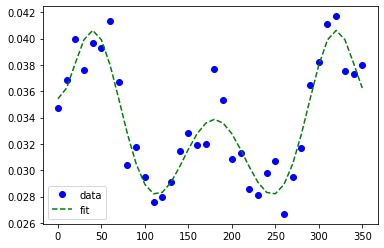

Chi-Squared Value for this fit: 2.652e-03
Chi-Squared Value for expected fit: 2.768e-03
MSE Loss Value for this fit: 8.706e-01
Average Error for set #4 using ANN = 7.74%
Average Error for set #4 using scipy = 4.84%


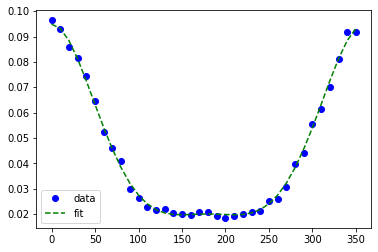

Chi-Squared Value for this fit: 1.653e-03
Chi-Squared Value for expected fit: 1.689e-03
MSE Loss Value for this fit: 5.466e-01
Average Error for set #5 using ANN = 6.59%
Average Error for set #5 using scipy = 8.27%


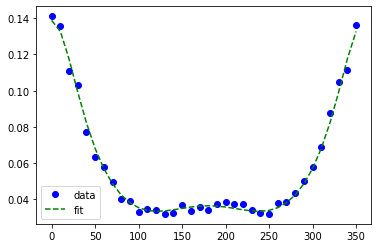

Chi-Squared Value for this fit: 4.356e-03
Chi-Squared Value for expected fit: 4.402e-03
MSE Loss Value for this fit: 8.926e-01
Average Error for set #6 using ANN = 12.41%
Average Error for set #6 using scipy = 7.93%


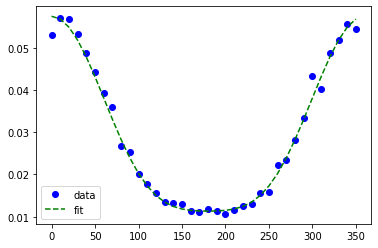

Chi-Squared Value for this fit: 2.620e-03
Chi-Squared Value for expected fit: 2.674e-03
MSE Loss Value for this fit: 1.014e+00
Average Error for set #7 using ANN = 5.14%
Average Error for set #7 using scipy = 10.68%


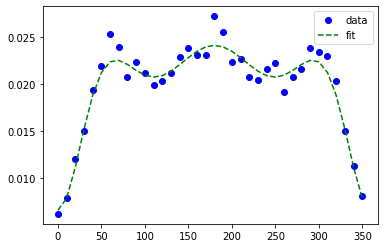

Chi-Squared Value for this fit: 2.189e-03
Chi-Squared Value for expected fit: 1.718e-03
MSE Loss Value for this fit: 1.125e+00
Average Error for set #8 using ANN = 20.03%
Average Error for set #8 using scipy = 5.51%


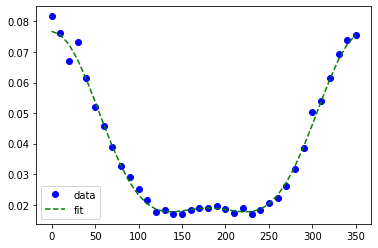

Chi-Squared Value for this fit: 2.485e-03
Chi-Squared Value for expected fit: 2.861e-03
MSE Loss Value for this fit: 6.812e-01
Average Error for set #9 using ANN = 16.10%
Average Error for set #9 using scipy = 15.53%


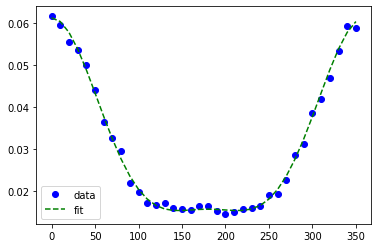

Chi-Squared Value for this fit: 1.247e-03
Chi-Squared Value for expected fit: 1.220e-03
MSE Loss Value for this fit: 5.631e-01
Average Error for set #10 using ANN = 5.33%
Average Error for set #10 using scipy = 6.76%


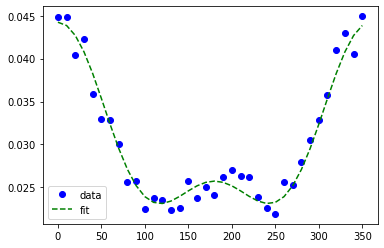

Chi-Squared Value for this fit: 2.359e-03
Chi-Squared Value for expected fit: 2.379e-03
MSE Loss Value for this fit: 8.913e-01
Average Error for set #11 using ANN = 7.85%
Average Error for set #11 using scipy = 5.96%


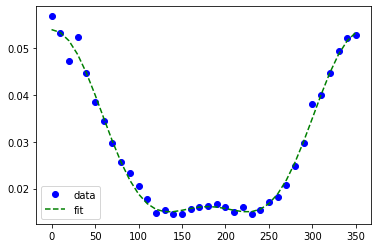

Chi-Squared Value for this fit: 1.798e-03
Chi-Squared Value for expected fit: 2.146e-03
MSE Loss Value for this fit: 6.660e-01
Average Error for set #12 using ANN = 14.96%
Average Error for set #12 using scipy = 14.40%

Avg. Error of ReH = 10.21%
Variance in Error of ReH = 30.54

Avg. Error of ReE = 11.05%
Variance in Error of ReE = 47.66

Avg. Error of ReHT = 7.47%
Variance in Error of ReHT = 27.03


In [3]:
for datset in range(13):
    a = datset*36
    b = a + 36


    xdat = np.asarray([phi[a:b], qq[a:b], xb[a:b], t[a:b], k[a:b], F1[a:b], F2[a:b], const[a:b]])
    x = Variable(torch.from_numpy(xdat[1:5].transpose()))
    y = Variable(torch.from_numpy(ydat[a:b].transpose()))
    xdat = Variable(torch.from_numpy(xdat))
    errs = Variable(torch.from_numpy(errF[a:b]))

    netH = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 70),
        torch.nn.Tanh(),
        torch.nn.Linear(70, 1)
    )
    
    netE = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 70),
        torch.nn.Tanh(),
        torch.nn.Linear(70, 1)
    )
    
    netHT = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 70),
        torch.nn.Tanh(),
        torch.nn.Linear(70, 1)
    )

    optimizer1 = torch.optim.Adam(netH.parameters(), lr=0.02)
    optimizer2 = torch.optim.Adam(netE.parameters(), lr=0.02)
    optimizer3 = torch.optim.Adam(netHT.parameters(), lr=0.02)

    for epoch in range(EPOCH):

        ReHnet = netH(x.float()) #output predicted value for ReH
        ReHfit = torch.mean(torch.transpose(ReHnet, 0, 1)[0])
        
        ReEnet = netE(x.float()) #output predicted value for ReE
        ReEfit = torch.mean(torch.transpose(ReEnet, 0, 1)[0])
        
        ReHTnet = netHT(x.float()) #output predicted value for ReHT
        ReHTfit = torch.mean(torch.transpose(ReHTnet, 0, 1)[0])
        
        cffs = [ReHfit, ReEfit, ReHTfit]

        loss = loss_func((xdat.float()), cffs, errs, y)
        
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        loss.backward()
        optimizer1.step()
        optimizer2.step()
        optimizer3.step()

    ReHfit = torch.mean(torch.transpose(ReHnet, 0, 1)[0]).data.numpy()
    ReEfit = torch.mean(torch.transpose(ReEnet, 0, 1)[0]).data.numpy()
    ReHTfit = torch.mean(torch.transpose(ReHTnet, 0, 1)[0]).data.numpy()
    fit_cffs = [ReHfit, ReEfit, ReHTfit]

    plt.plot(phi[a:b], ydat[a:b], 'bo', label='data')
    plt.plot(phi[a:b], f(xdat,fit_cffs), 'g--', label='fit')
    plt.legend()
    plt.show()

    err_H.append(abs(100*(abs(fit_cffs[0]-ReH_target[a]))/ReH_target[a]))
    err_E.append(abs(100*(abs(fit_cffs[1]-ReE_target[a]))/ReE_target[a]))
    err_HT.append(abs(100*(abs(fit_cffs[2]-ReHT_target[a]))/ReHT_target[a]))

    print('Chi-Squared Value for this fit: %.3e' % (chisquare(f(xdat,fit_cffs), ydat[a:b])[0]))
    print('Chi-Squared Value for expected fit: %.3e' % (chisquare(f(xdat,[ReH_target[a], ReE_target[a], ReHT_target[a]]), ydat[a:b])[0]))
    print('MSE Loss Value for this fit: %.3e' % (float(loss.data.float())))
    print('Average Error for set #%d using ANN = %.2f%%' % ((datset), ((err_H[-1]+err_E[-1]+err_HT[-1])/3)))
    dvcsfit.fit_scipy(datset)

print('\n\033[1m%s%.2f%%' % ('Avg. Error of ReH = ', sum(err_H)/len(err_H)))
print('\033[1m%s%.2f\n' % ('Variance in Error of ReH = ', np.var(err_H)))
print('\033[1m%s%.2f%%' % ('Avg. Error of ReE = ', sum(err_E)/len(err_E)))
print('\033[1m%s%.2f\n' % ('Variance in Error of ReE = ', np.var(err_E)))
print('\033[1m%s%.2f%%' % ('Avg. Error of ReHT = ', sum(err_HT)/len(err_HT)))
print('\033[1m%s%.2f' % ('Variance in Error of ReHT = ', np.var(err_HT)))